In [2]:
# Load dataset

import zipfile
import os
import pandas as pd

#with zipfile.ZipFile('ecg_data.zip', 'r') as zip_ref: #TODO: let hierop voor inleveren
#    zip_ref.extractall('ecg')

data = pd.read_csv('ecg/ecg_data.csv', index_col=0)

print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

data.head()

The number of samples: 827
The number of columns: 9001


,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,...,11_741,11_742,11_743,11_744,11_745,11_746,11_747,11_748,11_749,label
0,47.685046,48.416904,37.371002,61.604757,58.732738,213.067966,120.890451,40.100639,19.106303,6.043738,...,0.078753,0.379885,0.182930,0.231552,0.222432,0.154919,0.158616,0.269249,0.112248,0
1,152.726718,297.353726,111.168880,25.419423,14.636085,24.609688,49.533842,253.651571,483.852043,167.617409,...,0.804160,0.809705,0.830032,0.774368,0.798178,0.853519,0.827946,0.859936,0.742673,1
2,1.601260,3.882169,22.978997,21.673040,8.919484,18.329286,27.710604,23.350084,37.896254,8.331180,...,0.156080,0.102070,0.168276,0.120385,0.064254,0.077670,0.059857,0.098506,0.098288,0
3,1.388947,3.052483,3.084103,4.627886,10.016196,15.020347,139.823127,20.149108,10.393109,9.241921,...,0.238274,0.096733,0.030739,0.170214,0.052079,0.179360,0.226222,0.092000,0.192559,0
4,3.625561,3.728466,6.205367,17.722897,5.699401,9.024836,15.782812,33.336480,55.257804,19.139128,...,0.056914,0.059116,0.050098,0.152588,0.129712,0.047342,0.058446,0.141610,0.129477,0


In [3]:
# Preprocess data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming the first columns are features, and the last column is the label
X = data.iloc[:, :-1].values  # Features (ECG frequency data)
y = data.iloc[:, -1].values   # Labels (0 = Normal, 1 = Abnormal)

# Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Standardize Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

              precision    recall  f1-score   support

           0       0.83      1.00      0.90       137
           1       0.00      0.00      0.00        29

    accuracy                           0.83       166
   macro avg       0.41      0.50      0.45       166
weighted avg       0.68      0.83      0.75       166

Accuracy (No Feature Selection): 0.8253


c:\Users\groot\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\groot\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\groot\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


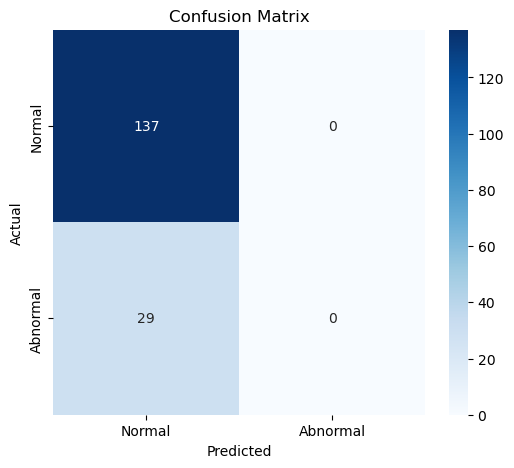

In [ ]:
# Compute a default Random Forest without any Feature Selection

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Random Forest without Feature Selection
rf_no_fs = RandomForestClassifier(random_state=42)
rf_no_fs.fit(X_train_scaled, y_train)
y_pred_no_fs = rf_no_fs.predict(X_val_scaled)

# Compute Accuracy, classification report & Confusion Matrix
accuracy_no_fs = accuracy_score(y_val, y_pred_no_fs)
print(classification_report(y_val, y_pred_no_fs))
cm_no_fs = confusion_matrix(y_val, y_pred_no_fs)

print(f"Accuracy (No Feature Selection): {accuracy_no_fs:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_no_fs, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       109
           1       0.67      0.25      0.36        24

    accuracy                           0.84       133
   macro avg       0.76      0.61      0.64       133
weighted avg       0.82      0.84      0.81       133

Accuracy (Mutual Information Feature Selection): 0.8421


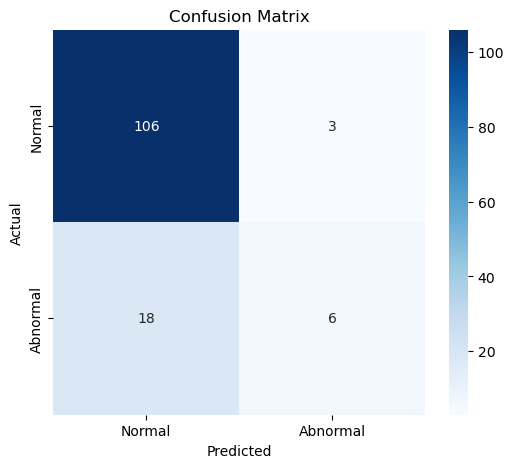

In [6]:
# Compute a default Random Forest with Feature Selection by Mutual Information

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Select Features using Mutual Information
mi_scores = mutual_info_classif(X_train_scaled, y_train)
mi_feature_indices = np.argsort(mi_scores)[-2100:]  # Select top 100 features
X_train_mi = X_train_scaled[:, mi_feature_indices]
X_val_mi = X_val_scaled[:, mi_feature_indices]

# Train Random Forest with Selected Features
rf_mi = RandomForestClassifier(random_state=42)
rf_mi.fit(X_train_mi, y_train)
y_pred_mi = rf_mi.predict(X_val_mi)

# Compute Accuracy, classification report & Confusion Matrix
accuracy_mi = accuracy_score(y_val, y_pred_mi)
print(classification_report(y_val, y_pred_mi))
cm_mi = confusion_matrix(y_val, y_pred_mi)

print(f"Accuracy (Mutual Information Feature Selection): {accuracy_mi:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_mi, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [7]:
# Feature selection using Genetic Algorithm

import random
from sklearn.ensemble import RandomForestClassifier
from deap import base, creator, tools, algorithms

# Define the evaluation function
def evaluate(individual):
    # Individual is a binary list representing selected features of a potential solution

    # Convert binary list to feature indices
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    
    # If no features are selected, return worst fitness
    if len(selected_features) == 0:
        return 0.0,
    
    # Select the features from the training data
    X_selected = X_train_scaled[:, selected_features]

    # Train Random Forest on selected features
    model = RandomForestClassifier(random_state=42)
    model.fit(X_selected, y_train)
    
    # Evaluate the accuracy of the model
    accuracy = model.score(X_selected, y_train)
    
    return accuracy,  # Return the accuracy as fitness score

# Set up Genetic Algorithm using DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,)) # Maximize fitness (so accuracy)
creator.create("Individual", list, fitness=creator.FitnessMax) # Create individual which represents a solution

toolbox = base.Toolbox() # Toolbox to hold genetic operations
toolbox.register("attr_bool", random.randint, 0, 1) # How to create a bit for the individual
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=X_train_scaled.shape[1]) # Creates and invidividual with n features
toolbox.register("population", tools.initRepeat, list, toolbox.individual) # Creates a population of individuals
toolbox.register("mate", tools.cxTwoPoint) # Crossover operation which combines two individuals
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05) # Randomly flips bits in the individual with a probability of 0.05
toolbox.register("select", tools.selTournament, tournsize=3) # Selects individuals for the next generation using tournament selection
toolbox.register("evaluate", evaluate)

# Run the Genetic Algorithm
population = toolbox.population(n=10) # Create a population of 10 individuals
algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=10, verbose=True) # ngen is the number of iterations of the GA

# Extract the best individual after the GA completes
best_individual = tools.selBest(population, k=1)[0] # Select the best individual (solution)
selected_features = [i for i, bit in enumerate(best_individual) if bit == 1]

# Print the number of features selected
print(f"Number of features selected: {len(selected_features)}")

gen	nevals
0  	10    
1  	9     
2  	10    
3  	10    
4  	10    
5  	8     
6  	6     
7  	6     
8  	6     
9  	8     
10 	9     
Number of features selected: 4463


              precision    recall  f1-score   support

           0       0.84      0.98      0.90       109
           1       0.60      0.12      0.21        24

    accuracy                           0.83       133
   macro avg       0.72      0.55      0.55       133
weighted avg       0.79      0.83      0.78       133

Accuracy (Genetic algorithm feature selection): 0.8271


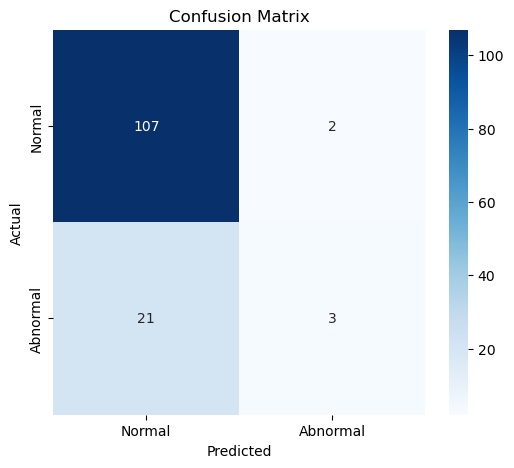

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Train Random Forest With Selected Features ###
X_train_ga = X_train_scaled[:, selected_features]
X_val_ga = X_val_scaled[:, selected_features]

model = RandomForestClassifier(random_state=42)
model.fit(X_train_ga, y_train)

# Predict on test data
y_pred_ga = model.predict(X_val_ga)

# Compute confusion matrix
cm_ga = confusion_matrix(y_val, y_pred_ga)
acc = accuracy_score(y_val, y_pred_ga)
print(classification_report(y_val, y_pred_ga))

print(f"Accuracy (Genetic algorithm feature selection): {acc:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ga, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()